In [ ]:
import profile
print(profile.__file__)
import os
import pandas as pd
import numpy as np
print(np.__version__)
import json
import matplotlib.pyplot as plt
import math
import shutil
from sklearn.metrics import mean_absolute_error,r2_score,
from jarvis.io.vasp.inputs import Poscar
from collections import Counter

In [ ]:
import dgl
print(dgl.__version__)
!nvcc --version
%pip install  dgl==1.1.3+cu121 -f https://data.dgl.ai/wheels/cu121/repo.html
#print(torch.version.cuda)
import torch
print(torch.__version__)
torch.cuda.current_device()
os.chdir("GitHub\\alignn\\alignn")
%pip install alignn
#%pip install numpy==1.21
#%pip uninstall jarvis -y
%pip install pydantic_settings
import alignn
print(alignn.__version__)

In [ ]:
p0 = pd.read_csv("../id_prop.csv",names=["label","val"])
p0=p0.sample(frac=1, ignore_index=True)
print(p0)

In [58]:
p0 = pd.read_csv("../id_prop.csv",names=["label","val"])
p0  =p0.drop([i for i in range(1,len(p0)+1,2)],axis='index')
p0.to_csv("../id_prop_P.csv",index=False,header=False)

In [ ]:
for i in range(len(p0)):
    print(f"{p0.label[i]},{p0.val[i]}")
    p1 = p0.label[i].replace("POSCAR","CONTCAR")
    print(f"{p1},{p0.val[i]}")

In [ ]:
cfiles = [a.replace("POSCAR","CONTCAR") for a in p0.label]
print(cfiles)

In [ ]:
p1 = ['ca','cd','mg','sr']
p2 = ['set1','set2']
p3 = "poscar-final"

for i in range(len(p1)):
    for j in range(len(p2)):
        path = os.path.join(p0,p1[i],p2[j])
        print(path)
        
        for src in os.listdir(os.path.join(path,p3)):
            dst = os.path.join(p0,'all', p1[i] + p2[j] +  src)
            shutil.copyfile(os.path.join(path,p3,src), dst)
        try: 
            os.remove(os.path.join(path,p3,"id_prop.csv"))
        except:
            None
        g = [int(a[7:]) for a in os.listdir(os.path.join(path,p3))]
        g.sort()
        g = [p1[i] + p2[j] + 'POSCAR.'+ str(a) for a in g]
        df = pd.read_csv(os.path.join(path,'unrelaxed_energy.dat'), header=None, names=['values'])
        df['id'] = g
        df  = df[['id','values']]
        # Save the modified DataFrame back to the file (if needed)
        df.to_csv('data/id_prop.csv',mode='a', header=False, index=False)


In [10]:
p = "data/ca/set1/contcar-final/CONTCAR.3"
gp  = Poscar.from_file(p).to_dict()
Counter(gp['atoms']['elements'])

Counter({'Cs': 4, 'Pb': 3, 'Ca': 1, 'Br': 12})

In [ ]:
p0 = "data"
p1 = ['ca','cd','mg','sr']
p2 = ['set1','set2']
p3 = "poscar-final"
p4 = 'allposcarF'
df=[]

if not os.path.exists(os.path.join(p0,p4)):
    os.mkdir(os.path.join(p0,p4))
for i in range(len(p1)):
    for j in range(len(p2)):
        path = os.path.join(p0,p1[i],p2[j])
        print(path)
        
        for src in os.listdir(os.path.join(path,p3)):
            #create the new folder vvv first
            dst = os.path.join(p0,p4, p1[i] + p2[j] +  src)
            shutil.copyfile(os.path.join(path,p3,src), dst)
        try: 
            os.remove(os.path.join(path,p3,"id_prop.csv"))
        except:
            None
        #files aren't sorted, so we have to do this
        g = [int(a[7:]) for a in os.listdir(os.path.join(path,p3))]
        g.sort()
        df = pd.read_csv(os.path.join(path,'isif3_energy.dat'), header=None, names=['values'])
        g = ['POSCAR.'+ str(a) for a in g]
        for k, src in enumerate(g):
            gp = Poscar.from_file( os.path.join(path,p3,src) ).to_dict()
            df.loc[k,'values'] = df.loc[k,'values']#/len(gp['atoms']['elements'])
            cc = Counter(gp['atoms']['elements'])
            df.loc[k,'Pb'] = cc['Pb']
            df.loc[k,'Ca'] = cc['Ca']
            df.loc[k,'Cd'] = cc['Cd']
            df.loc[k,'Mg'] = cc['Mg']
            df.loc[k,'Sr'] = cc['Sr']
            df.loc[k,'Br'] = cc['Br']
            df.loc[k,'Cs'] = cc['Cs']
            
        g = [p1[i] + p2[j] + a for a in g]
        df['id'] = g
        # df  = df[['id','values','Pb']]
        # Save the modified DataFrame back to the file (if needed)
        df.to_csv(os.path.join(p0,p4,'id_prop.csv'),mode='a', header=False, index=False)


In [ ]:
#448/32=14
!python -u train_alignn.py --root_dir "..\data\POSCAR" --epochs 50 --batch_size 64 --config "..\data\config_example.json" --output_dir=temp_all_1
#ca1_10
#--restart_model_path=temp_mg1_30/best_model.pt


### Sample output

```py
id_prop_csv_file exists True
len dataset 50
len dataset 50
MAX val: 6.149
MIN val: 0.0
MAD: 1.0520696
Baseline MAE: 2.3805500000000004
data range 4.907 0.0
Converting to graphs!
df                         jid  ...                                              atoms
0   POSCAR-JVASP-90856.vasp  ...  {'lattice_mat': [[3.566933224304235, 0.0, -0.0...
1   POSCAR-JVASP-86097.vasp  ...  {'lattice_mat': [[4.089078911208881, 0.0, 0.0]...
2   POSCAR-JVASP-64906.vasp  ...  {'lattice_mat': [[-1.833590720595598, 1.833590...
3   POSCAR-JVASP-98225.vasp  ...  {'lattice_mat': [[7.2963518353359165, 0.0, 0.0...
4      POSCAR-JVASP-10.vasp  ...  {'lattice_mat': [[1.6777483798834445, -2.90594...
5   POSCAR-JVASP-14014.vasp  ...  {'lattice_mat': [[4.157436115454804, -0.0, 0.0...
6   POSCAR-JVASP-64664.vasp  ...  {'lattice_mat': [[0.0, 5.1858714074842, 5.1858...
7   POSCAR-JVASP-22556.vasp  ...  {'lattice_mat': [[3.790914410660539, -0.0, 0.0...
8   POSCAR-JVASP-86726.vasp  ...  {'lattice_mat': [[4.284492173131309, 1.636192e...
9   POSCAR-JVASP-28634.vasp  ...  {'lattice_mat': [[3.2250494729190726, 2.216578...
10  POSCAR-JVASP-98550.vasp  ...  {'lattice_mat': [[5.587070827330502, -0.006443...
11  POSCAR-JVASP-89265.vasp  ...  {'lattice_mat': [[4.927781968323723, -0.0, 0.0...
12  POSCAR-JVASP-97915.vasp  ...  {'lattice_mat': [[10.725911963093319, 1.159968...
13  POSCAR-JVASP-90228.vasp  ...  {'lattice_mat': [[5.140164879556414, 0.3718366...
14  POSCAR-JVASP-42300.vasp  ...  {'lattice_mat': [[5.194393535053021, 0.0345773...
15  POSCAR-JVASP-86968.vasp  ...  {'lattice_mat': [[4.927229198330356, -0.0, -0....
16  POSCAR-JVASP-90532.vasp  ...  {'lattice_mat': [[4.839493559425439, 9.7116505...
17  POSCAR-JVASP-50332.vasp  ...  {'lattice_mat': [[-2.2512310528422197, 1.49649...
18  POSCAR-JVASP-86205.vasp  ...  {'lattice_mat': [[7.709535704177289, 2.46207e-...
19  POSCAR-JVASP-28704.vasp  ...  {'lattice_mat': [[3.292134155794691, 0.0, 0.0]...
20  POSCAR-JVASP-60702.vasp  ...  {'lattice_mat': [[9.067075684180468, -0.0, 0.0...
21  POSCAR-JVASP-97799.vasp  ...  {'lattice_mat': [[6.850665464204784, -0.0, 0.0...
22  POSCAR-JVASP-28565.vasp  ...  {'lattice_mat': [[3.3542337275744103, 0.0, 0.0...
23  POSCAR-JVASP-86436.vasp  ...  {'lattice_mat': [[4.509029640475962, 0.0564034...
24   POSCAR-JVASP-1372.vasp  ...  {'lattice_mat': [[3.5058938597621094, -3.08124...
25  POSCAR-JVASP-14873.vasp  ...  {'lattice_mat': [[4.191262576674699, 0.0, -0.0...
26  POSCAR-JVASP-28397.vasp  ...  {'lattice_mat': [[0.0, -3.9587610833154616, 0....
27  POSCAR-JVASP-98284.vasp  ...  {'lattice_mat': [[4.084155317570781, -1.066825...
28  POSCAR-JVASP-89025.vasp  ...  {'lattice_mat': [[9.407270982425844, 0.0171637...
29   POSCAR-JVASP-1996.vasp  ...  {'lattice_mat': [[3.93712543178282, 0.0, 2.273...
30  POSCAR-JVASP-48166.vasp  ...  {'lattice_mat': [[-0.0127275386492899, 4.47534...
31  POSCAR-JVASP-15345.vasp  ...  {'lattice_mat': [[3.5666343258756448, 0.0, 0.0...
32  POSCAR-JVASP-97378.vasp  ...  {'lattice_mat': [[7.843871888963013, 0.0, 0.0]...
33  POSCAR-JVASP-97984.vasp  ...  {'lattice_mat': [[5.157077730332642, 0.0020004...
34  POSCAR-JVASP-98224.vasp  ...  {'lattice_mat': [[3.8114364321417686, 0.0, 0.0...
35  POSCAR-JVASP-98167.vasp  ...  {'lattice_mat': [[5.464512229851642, 0.0, -2.0...
36  POSCAR-JVASP-64045.vasp  ...  {'lattice_mat': [[0.0, 4.936437902689708, 4.93...
37  POSCAR-JVASP-63912.vasp  ...  {'lattice_mat': [[0.0, 4.893247728183244, 4.89...
38  POSCAR-JVASP-64003.vasp  ...  {'lattice_mat': [[0.0, 4.901572410735, 4.90157...
39  POSCAR-JVASP-64584.vasp  ...  {'lattice_mat': [[0.0, 5.104615296684174, 5.10...

[40 rows x 3 columns]
warning: could not load CGCNN features for 103
Setting it to max atomic number available here, 103
warning: could not load CGCNN features for 101
Setting it to max atomic number available here, 103
warning: could not load CGCNN features for 102
Setting it to max atomic number available here, 103
building line graphs
data range 1.569 0.0
Converting to graphs!
df                         jid  ...                                              atoms
0   POSCAR-JVASP-64240.vasp  ...  {'lattice_mat': [[-0.0, 5.040771484524319, 5.0...
1  POSCAR-JVASP-107772.vasp  ...  {'lattice_mat': [[4.376835486482439, 0.0086562...
2   POSCAR-JVASP-64719.vasp  ...  {'lattice_mat': [[-0.0, 5.037541505850243, 5.0...
3   POSCAR-JVASP-97499.vasp  ...  {'lattice_mat': [[10.37325585559557, -2.271858...
4   POSCAR-JVASP-64377.vasp  ...  {'lattice_mat': [[0.0, 5.129874508851702, 5.12...

[5 rows x 3 columns]
building line graphs
data range 6.149 0.0
Converting to graphs!
df                        jid  ...                                              atoms
0  POSCAR-JVASP-21210.vasp  ...  {'lattice_mat': [[1.6712283e-08, -2.5080296697...
1  POSCAR-JVASP-97677.vasp  ...  {'lattice_mat': [[6.603532697435508, 0.0, -0.0...
2  POSCAR-JVASP-65101.vasp  ...  {'lattice_mat': [[-0.0, 4.517300851474054, 4.5...
3  POSCAR-JVASP-65062.vasp  ...  {'lattice_mat': [[-0.0, 4.326757913323647, 4.3...
4  POSCAR-JVASP-97570.vasp  ...  {'lattice_mat': [[6.9098665629767275, 0.128626...

[5 rows x 3 columns]
building line graphs
n_train: 40
n_val  : 5
n_test : 5
dataset {'jid': 'POSCAR-JVASP-90856.vasp', 'target': 0.0, 'atoms': OrderedDict([('lattice_mat', [[3.566933224304235, 0.0, -0.0], [0.0, 3.566933224304235, -0.0], [-0.0, -0.0, 9.397075454186664]]), ('coords', [[0.7500000000000001, 0.7500000000000001, 0.784935507022239], [0.25, 0.25, 0.2150644929777609], [0.25, 0.7500000000000001, 0.5], [0.7500000000000001, 0.25, 0.5], [0.25, 0.7500000000000001, 0.0], [0.7500000000000001, 0.25, 0.0], [0.7500000000000001, 0.7500000000000001, 0.3074869598412097], [0.25, 0.25, 0.6925130401587904]]), ('elements', ['Ti', 'Ti', 'Cu', 'Cu', 'Si', 'Si', 'As', 'As']), ('abc', [3.56693, 3.56693, 9.39708]), ('angles', [90.0, 90.0, 90.0]), ('cartesian', False), ('props', ['', '', '', '', '', '', '', ''])])}
version='112bbedebdaecf59fb18e11c929080fb2f358246' dataset='user_data' target='target' atom_features='cgcnn' neighbor_strategy='k-nearest' id_tag='jid' random_seed=123 classification_threshold=None n_val=None n_test=None n_train=None train_ratio=0.8 val_ratio=0.1 test_ratio=0.1 target_multiplication_factor=None epochs=3 batch_size=2 weight_decay=1e-05 learning_rate=0.001 filename='sample' warmup_steps=2000 criterion='mse' optimizer='adamw' scheduler='onecycle' pin_memory=False save_dataloader=False write_checkpoint=True write_predictions=True store_outputs=True progress=True log_tensorboard=False standard_scalar_and_pca=False use_canonize=True num_workers=0 cutoff=8.0 cutoff_extra=3.0 max_neighbors=12 keep_data_order=True normalize_graph_level_loss=False distributed=False data_parallel=False n_early_stopping=None output_dir='temp1' model=ALIGNNAtomWiseConfig(name='alignn_atomwise', alignn_layers=4, gcn_layers=4, atom_input_features=92, edge_input_features=80, triplet_input_features=40, embedding_features=64, hidden_features=256, output_features=1, grad_multiplier=-1, calculate_gradient=True, atomwise_output_features=0, graphwise_weight=1.0, gradwise_weight=0.0, stresswise_weight=0.0, atomwise_weight=0.0, link='identity', zero_inflated=False, classification=False, force_mult_natoms=False, energy_mult_natoms=False, include_pos_deriv=False, use_cutoff_function=False, inner_cutoff=6.0, stress_multiplier=1.0, add_reverse_forces=False, lg_on_fly=False, batch_stress=True, extra_features=0)
config:
{'atom_features': 'cgcnn',
 'batch_size': 2,
 'classification_threshold': None,
 'criterion': 'mse',
 'cutoff': 8.0,
 'cutoff_extra': 3.0,
 'data_parallel': False,
 'dataset': 'user_data',
 'distributed': False,
 'epochs': 3,
 'filename': 'sample',
 'id_tag': 'jid',
 'keep_data_order': True,
 'learning_rate': 0.001,
 'log_tensorboard': False,
 'max_neighbors': 12,
 'model': {'add_reverse_forces': False,
           'alignn_layers': 4,
           'atom_input_features': 92,
           'atomwise_output_features': 0,
           'atomwise_weight': 0.0,
           'batch_stress': True,
           'calculate_gradient': True,
           'classification': False,
           'edge_input_features': 80,
           'embedding_features': 64,
           'energy_mult_natoms': False,
           'extra_features': 0,
           'force_mult_natoms': False,
           'gcn_layers': 4,
           'grad_multiplier': -1,
           'gradwise_weight': 0.0,
           'graphwise_weight': 1.0,
           'hidden_features': 256,
           'include_pos_deriv': False,
           'inner_cutoff': 6.0,
           'lg_on_fly': False,
           'link': 'identity',
           'name': 'alignn_atomwise',
           'output_features': 1,
           'stress_multiplier': 1.0,
           'stresswise_weight': 0.0,
           'triplet_input_features': 40,
           'use_cutoff_function': False,
           'zero_inflated': False},
 'n_early_stopping': None,
 'n_test': None,
 'n_train': None,
 'n_val': None,
 'neighbor_strategy': 'k-nearest',
 'normalize_graph_level_loss': False,
 'num_workers': 0,
 'optimizer': 'adamw',
 'output_dir': 'temp1',
 'pin_memory': False,
 'progress': True,
 'random_seed': 123,
 'save_dataloader': False,
 'scheduler': 'onecycle',
 'standard_scalar_and_pca': False,
 'store_outputs': True,
 'target': 'target',
 'target_multiplication_factor': None,
 'test_ratio': 0.1,
 'train_ratio': 0.8,
 'use_canonize': True,
 'val_ratio': 0.1,
 'version': '112bbedebdaecf59fb18e11c929080fb2f358246',
 'warmup_steps': 2000,
 'weight_decay': 1e-05,
 'write_checkpoint': True,
 'write_predictions': True}

TrainLoss Epoch 0 total 58.33496695756912 out 2.9167483663652094 atom nan grad nan stress nan time 12.666625738143921
ValLoss Epoch 0 total 2.6799525022506714 out 1.3399762660264969 atom nan grad nan stress nan Saving model
TrainLoss Epoch 1 total 19.572160094976425 out 0.9786080041434616 atom nan grad nan stress nan time 11.867806196212769
ValLoss Epoch 1 total 1.4585568308830261 out 0.7292784303426743 atom nan grad nan stress nan Saving model
TrainLoss Epoch 2 total 17.3842104524374 out 0.869210508139804 atom nan grad nan stress nan time 11.289070129394531
ValLoss Epoch 2 total 1.638917863368988 out 0.819458931684494 atom nan grad nan stress nan 
TestLoss 2 10.70402467250824
Test MAE: 2.1408048987388613
Time taken (s) 48.44701790809631

0it [00:00, ?it/s]
1it [00:00,  9.29it/s]
5it [00:00, 25.11it/s]
10it [00:00, 34.29it/s]
14it [00:00, 31.35it/s]
18it [00:00, 31.84it/s]
22it [00:00, 29.67it/s]
27it [00:00, 33.77it/s]
31it [00:00, 35.13it/s]
35it [00:01, 33.43it/s]
39it [00:01, 31.84it/s]
40it [00:01, 31.90it/s]

  0%|          | 0/40 [00:00<?, ?it/s]
 90%|█████████ | 36/40 [00:00<00:00, 343.91it/s]
100%|██████████| 40/40 [00:00<00:00, 362.12it/s]

0it [00:00, ?it/s]
4it [00:00, 34.01it/s]
5it [00:00, 38.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]
100%|██████████| 5/5 [00:00<00:00, 524.22it/s]

0it [00:00, ?it/s]
2it [00:00, 17.47it/s]
5it [00:00, 25.66it/s]

  0%|          | 0/5 [00:00<?, ?it/s]
100%|██████████| 5/5 [00:00<00:00, 492.81it/s]
```

## Loss plots

Cross validation was a new feature of the project not found in the original ALIGNN implementation. The aim was to compare the different classes (i.e. atom types) within the dataset.

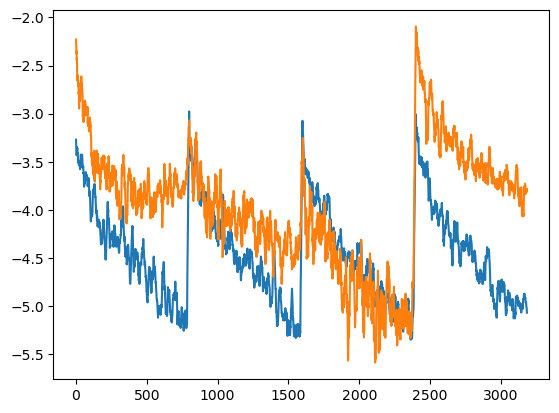

In [160]:
def moving_average(y, window_size):
    cumulative_sum = np.cumsum(y, dtype=float)
    cumulative_sum[window_size:] = cumulative_sum[window_size:] - cumulative_sum[:-window_size]
    return cumulative_sum[window_size - 1:] / window_size
window_size=15
ax=[]
ay=[]
for a in range(4):

    f=open('CV2_lr3-5/' + str(a)+ 'history_train.json',)
    for h in json.load(f):
        ax.append(math.log(h[0]))
    f=open('CV2_lr3-5/' + str(a)+ 'history_val.json',)
    for h in json.load(f):
        ay.append(math.log(h[0]))
plt.plot(moving_average(ax, window_size)[1:])
plt.plot(moving_average(ay, window_size)[1:])


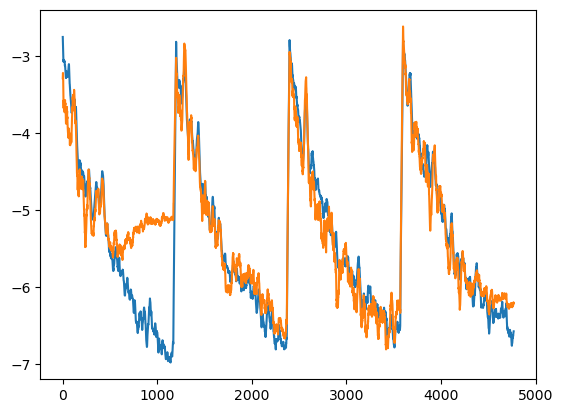

In [205]:
window_size=30
ax=[]
ay=[]
for a in range(4):

    f=open('CV2_9/' + str(a)+ 'history_train.json',)
    for h in json.load(f):
        ax.append(math.log(h[0]))
    f=open('CV2_9/' + str(a)+ 'history_val.json',)
    for h in json.load(f):
        ay.append(math.log(h[0]))
plt.plot(moving_average(ax, window_size)[1:])
plt.plot(moving_average(ay, window_size)[1:])

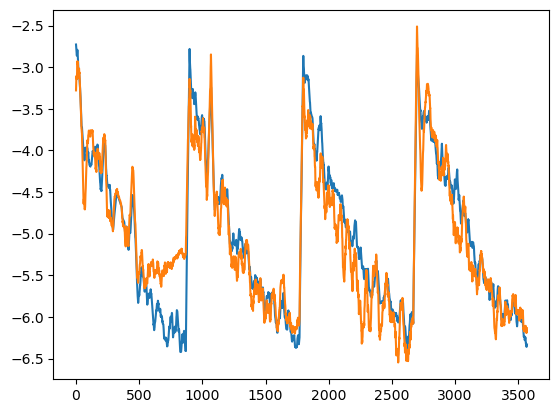

In [206]:
ax=[]
ay=[]
for a in range(4):
    f=open('CV2_7/' + str(a)+ 'history_train.json',)
    for h in json.load(f):
        ax.append(math.log(h[0]))
    f=open('CV2_7/' + str(a)+ 'history_val.json',)
    for h in json.load(f):
        ay.append(math.log(h[0]))
plt.plot(moving_average(ax, window_size)[1:])
plt.plot(moving_average(ay, window_size)[1:])

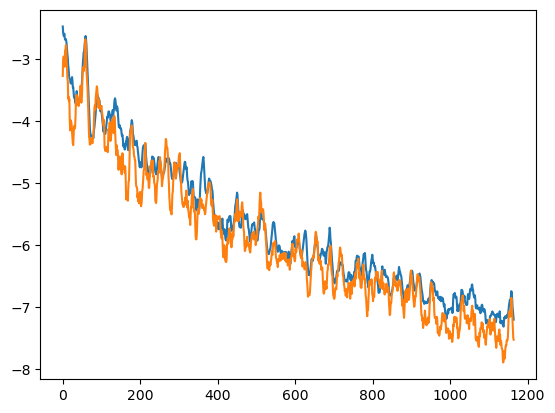

In [264]:
ax=[]
ay=[]
f=open('ex_/0history_train.json',)
for h in json.load(f):
    ax.append(math.log(h[0]))
f=open('ex_/0history_val.json',)
for h in json.load(f):
    ay.append(math.log(h[0]))

window_size=10
plt.plot(moving_average(ax, window_size)[1:])
plt.plot(moving_average(ay, window_size)[1:])

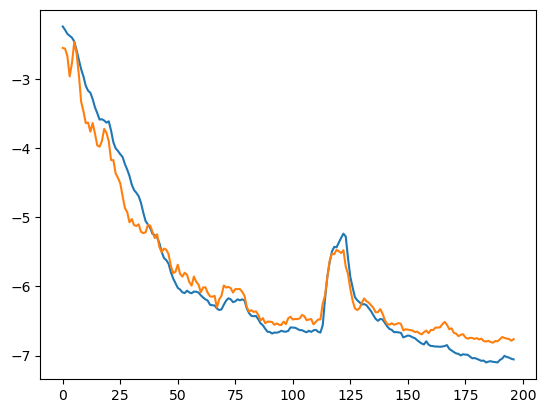

In [26]:
ax=[]
ay=[]
f=open('tempF_U2/history_train.json',)
for h in json.load(f):
    ax.append(math.log(h[0]))
f=open('tempF_U2/history_val.json',)
for h in json.load(f):
    ay.append(math.log(h[0]))

window_size=10
plt.plot(moving_average(ax, window_size)[1:])
plt.plot(moving_average(ay, window_size)[1:])

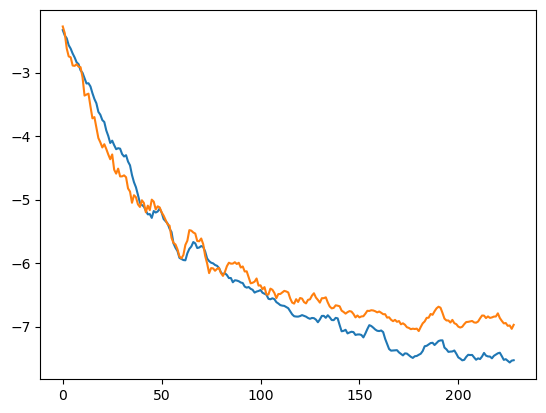

In [19]:
ax=[]
ay=[]
f=open('tempF_REL/history_train.json',)
for h in json.load(f):
    ax.append(math.log(h[0]))
f=open('tempF_REL/history_val.json',)
for h in json.load(f):
    ay.append(math.log(h[0]))

window_size=10
plt.plot(moving_average(ax, window_size)[1:])
plt.plot(moving_average(ay, window_size)[1:])

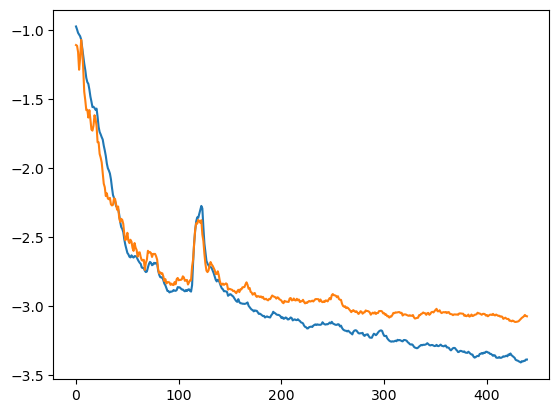

In [47]:
ax=[]
ay=[]
f=open('tempF2/history_train.json',)
for h in json.load(f):
    ax.append(math.log10(h[0]))
f=open('tempF2/history_val.json',)
for h in json.load(f):
    ay.append(math.log10(h[0]))

window_size=10
plt.plot(moving_average(ax, window_size)[1:])
plt.plot(moving_average(ay, window_size)[1:])

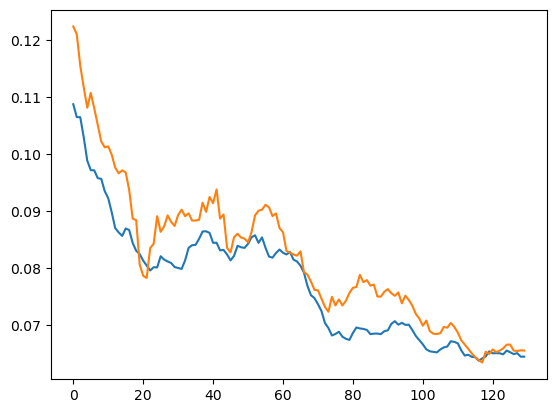

In [44]:
ax=[]
ay=[]
f=open('ex_sr_1e-4/history_train.json',)
for h in json.load(f):
    ax.append(h[0])
f=open('ex_sr_1e-4/history_val.json',)
for h in json.load(f):
    ay.append(h[0])
plt.plot(moving_average(ax, window_size)[1:])
plt.plot(moving_average(ay, window_size)[1:])

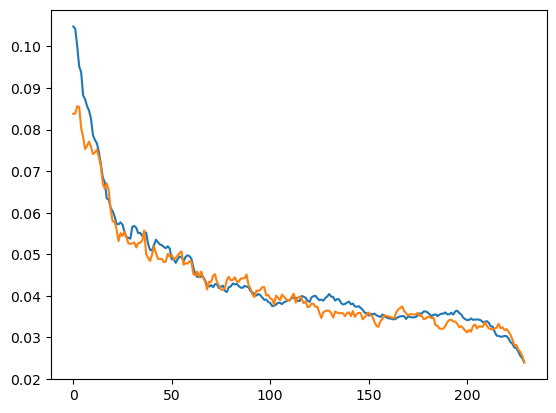

In [42]:
ax=[]
ay=[]
f=open('tempcd2/history_train.json',)
for h in json.load(f):
    ax.append(h[0])
f=open('tempcd2/history_val.json',)
for h in json.load(f):
    ay.append(h[0])
window_size=20
plt.plot(moving_average(ax, window_size)[1:])
plt.plot(moving_average(ay, window_size)[1:])

mg 0.00041949206349206343
r2 0.8882941120323139
cd 0.00022235897435897434
r2 0.949274915575966
ca 0.00012869230769230763
r2 0.9622411402671792
sr 0.00013499999999999997
r2 0.936358395214031


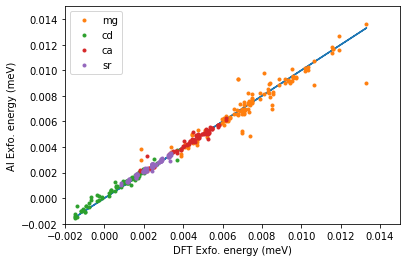

In [72]:
plt.xlim(-0.002,0.015)
plt.ylim(-0.002,0.015)
df = pd.read_csv('tempaugFfix2/prediction_results_test_set.csv')
df['el'] = df['id'].str[:2]
el = ['mg','cd','ca','sr']

plt.plot(np.array(df['target']),np.array(df['target']))
for i in range(4):
    df2 = df.loc[df['el'] == el[i]]
    #print(df2)
    plt.plot(np.array(df2['target']),np.array(df2['prediction']),'.',label=el[i])
    plt.xlabel('DFT Exfo. energy (meV)')
    plt.ylabel('AI Exfo. energy (meV)')
    print(el[i],mean_absolute_error(np.array(df2['target']),np.array(df2['prediction'])))
    print("r2", r2_score(np.array(df2['target']),np.array(df2['prediction'])))
plt.legend()

0.00025658859536082474

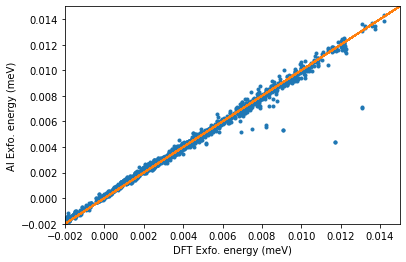

In [74]:
df = pd.read_csv('tempaugFfix2/prediction_results_train_set.csv')
plt.plot(np.array(df['target']),np.array(df['prediction']),'.')
plt.plot(np.array(df['target']),np.array(df['target']))
plt.xlabel('DFT Exfo. energy (meV)')
plt.xlim(-0.002,0.015)
plt.ylim(-0.002,0.015)
plt.ylabel('AI Exfo. energy (meV)')
mean_absolute_error(np.array(df['target']),np.array(df['prediction']))

In [77]:
from alignn.models.alignn_atomwise import ALIGNNAtomWise, ALIGNNAtomWiseConfig
import torch
output_features =  1
filename = 'tempF2/best_model.pt'
device = "cpu"
if torch.cuda.is_available():
    device = torch.device("cuda")
model = ALIGNNAtomWise(ALIGNNAtomWiseConfig(name="alignn_atomwise", output_features=output_features))
model.load_state_dict(torch.load(filename, map_location=device))
model.eval()

ALIGNNAtomWise(
  (atom_embedding): MLPLayer(
    (layer): Sequential(
      (0): Linear(in_features=92, out_features=256, bias=True)
      (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (2): SiLU()
    )
  )
  (edge_embedding): Sequential(
    (0): RBFExpansion()
    (1): MLPLayer(
      (layer): Sequential(
        (0): Linear(in_features=80, out_features=64, bias=True)
        (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (2): SiLU()
      )
    )
    (2): MLPLayer(
      (layer): Sequential(
        (0): Linear(in_features=64, out_features=256, bias=True)
        (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (2): SiLU()
      )
    )
  )
  (angle_embedding): Sequential(
    (0): RBFExpansion()
    (1): MLPLayer(
      (layer): Sequential(
        (0): Linear(in_features=40, out_features=64, bias=True)
        (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (2): SiLU()
      )
    )
    (2): MLPLayer(
     

In [ ]:
import os
import pandas as pd
p0 = "Github\\alignn\data"
p1 = ['mg']
p2 = ['set1']
p3 = "contcar-final"
for i in range(len(p1)):
    for j in range(len(p2)):
        path = os.path.join(p0,p1[i],p2[j])
        print(path)
        try: 
            os.remove(os.path.join(path,p3,"id_prop.csv"))
        except:
            None
        g = [int(a[7:]) for a in os.listdir(os.path.join(path,p3))]
        g.sort()
        g = ['POSCAR.'+ str(a) for a in g]
        df = pd.read_csv(os.path.join(path,'isif3_energy.dat'), header=None, names=['values'])
        df['id'] = g
        df  = df[['id','values']]
        # Save the modified DataFrame back to the file (if needed)
        df.to_csv(os.path.join(path,p3,"id_prop.csv"),mode='a', header=False, index=False)


In [41]:
csv_filename = 'POSCAR.csv'
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    #writer.writerow(['Index', 'Array1', 'Array2', 'Array3'])
    
    # Write rows
    for i, (a1, a2, a3) in enumerate(zip(al,ax,ay), start=1):
        writer.writerow([a1, a2, a3])

In [ ]:
from jarvis.core.atoms import Atoms
from alignn.graphs import Graph
from tqdm import tqdm as tq
cutoff = 8.0
model=model.to(device)
max_neighbors = 12
ax=[]
ay=[]
al=[]
import pandas as pd
df = pd.read_csv('data/allposcarF/id_prop.csv', header=None, names=['id','target'])

for i in tq(range(len(df))):
    
    x = df['id'][i]
    atoms = Atoms.from_poscar(f'data/allposcarF/{x}')
    g, lg = Graph.atom_dgl_multigraph(
        atoms, cutoff=float(cutoff), max_neighbors=max_neighbors,
    )
    out_data = (
        model([g.to(device), lg.to(device)])['out']
        .detach()
        .cpu()
        .numpy()
        .flatten()
        .tolist()
    )
    ax.append(df['target'][i])
    ay.append(out_data[0])
    al.append(x)
    #print (f'output {out_data[0]} actual:{ax[-1]}')
import matplotlib.pyplot as plt
plt.plot(ax,ay,'.')
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ax,ay)

### Formation energy / Total Energy Plot

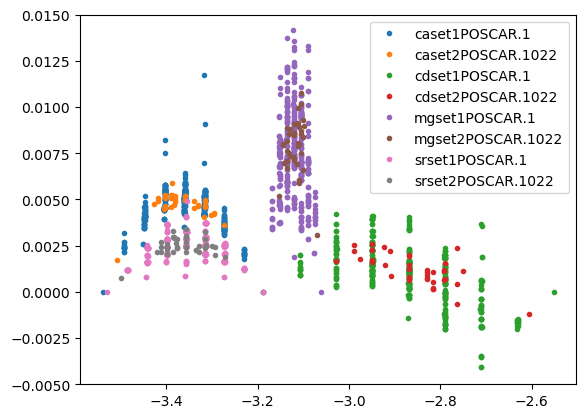

In [109]:
plt.ylim(-0.005,0.015)
nn = int(len(df)/4)+1
#plt.plot(ax,ax)
set_size = 447
I=0
for i in range(0, 4):
    if i: I=1
    plt.plot(ay[nn*i-I:nn*i+set_size],ax[nn*i-I:nn*i+set_size], '.',label = al[nn*i-I])
    plt.plot(ay[nn*i+set_size+1:nn*(i+1)-1],ax[nn*i+set_size+1:nn*(i+1)-1], '.',label = al[nn*i+set_size])
    #plt.scatter(ax[nn*i:nn*(i+1)-1], ay[nn*i:nn*(i+1)-1],label = f'{nn*i} to {nn*(i+1)-1}',c=[i for i in range(nn-1)],alpha=0.2,marker='.')
    #plt.colorbar()
    plt.legend()

### Parity Plots and plots of exclusion tests

0.00021456564706563865
0.0007290558761833666
0.00020968717749610482
0.00025875756784634875
0.0004983851516633509
0.0003655969463560989
0.00028410881740321395
0.00022844330898346075


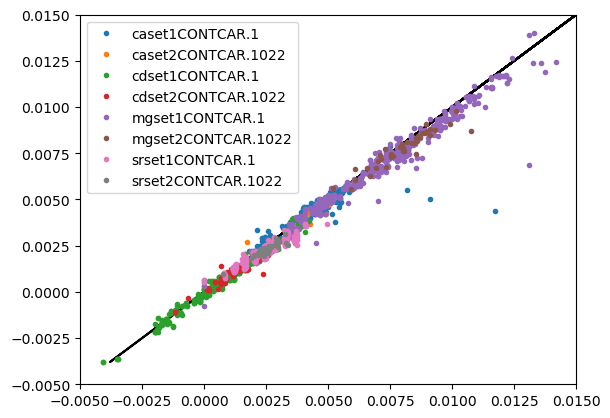

In [15]:
plt.xlim(-0.005,0.015)
plt.ylim(-0.005,0.015)
nn = int(len(df)/4)+1
plt.plot(ay,ay,c='black')
set_size = 447
I=0

for i in range(0, 4):
    if i: I=1
    plt.plot(ax[nn*i-I:nn*i+set_size],ay[nn*i-I:nn*i+set_size], '.',label = al[nn*i-I])
    print(mean_absolute_error(ax[nn*i-I:nn*i+set_size],ay[nn*i-I:nn*i+set_size]))
    plt.plot(ax[nn*i+set_size+1:nn*(i+1)-1],ay[nn*i+set_size+1:nn*(i+1)-1], '.',label = al[nn*i+set_size])
    print(mean_absolute_error(ax[nn*i+set_size+1:nn*(i+1)-1],ay[nn*i+set_size+1:nn*(i+1)-1]))
    #plt.scatter(ax[nn*i:nn*(i+1)-1], ay[nn*i:nn*(i+1)-1],label = f'{nn*i} to {nn*(i+1)-1}',c=[i for i in range(nn-1)],alpha=0.2,marker='.')
    #plt.colorbar()
plt.legend()

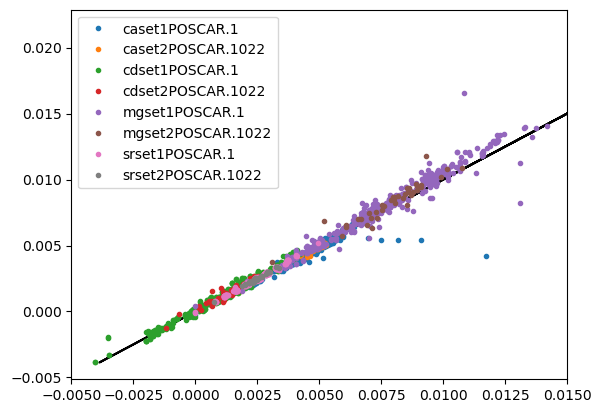

In [9]:
## tempF2, normal lr

plt.xlim(-0.005,0.015)
nn = int(len(df)/4)+1
plt.plot(ay,ay,c='black')
set_size = 447
I=0
for i in range(0, 4):
    if i: I=1
    plt.plot(ax[nn*i-I:nn*i+set_size],ay[nn*i-I:nn*i+set_size], '.',label = al[nn*i-I])
    plt.plot(ax[nn*i+set_size+1:nn*(i+1)-1],ay[nn*i+set_size+1:nn*(i+1)-1], '.',label = al[nn*i+set_size])
    #plt.scatter(ax[nn*i:nn*(i+1)-1], ay[nn*i:nn*(i+1)-1],label = f'{nn*i} to {nn*(i+1)-1}',c=[i for i in range(nn-1)],alpha=0.2,marker='.')
    #plt.colorbar()
plt.legend()

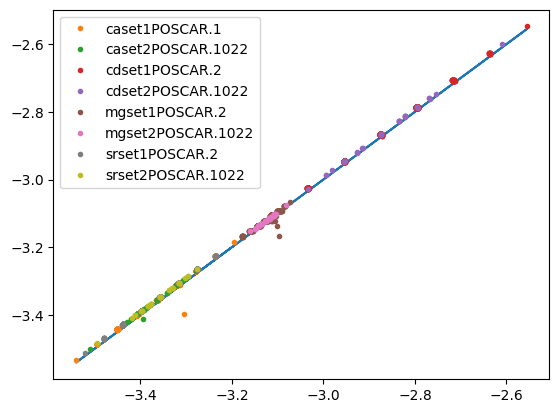

In [69]:
nn = int(len(df)/4)+1
plt.plot(ax,ax)
for i in range(0, 4):
    plt.plot(ax[nn*i:nn*i+447], ay[nn*i:nn*i+447],'.',label = al[nn*i])
    plt.plot(ax[nn*i+448:nn*(i+1)-1], ay[nn*i+448:nn*(i+1)-1],'.',label = al[nn*i+447])
    #plt.scatter(ax[nn*i:nn*(i+1)-1], ay[nn*i:nn*(i+1)-1],label = f'{nn*i} to {nn*(i+1)-1}',c=[i for i in range(nn-1)],alpha=0.2,marker='.')
    #plt.colorbar()
    plt.legend()

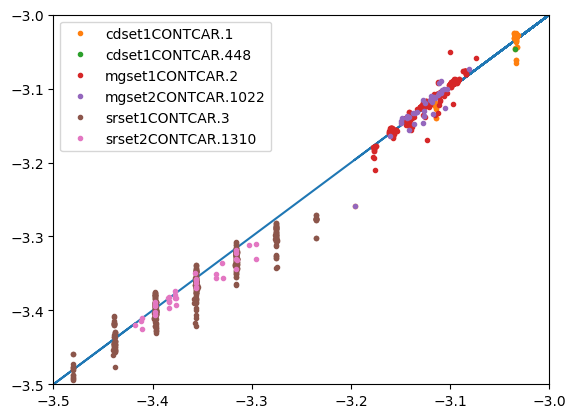

In [57]:
plt.xlim(-3.5,-3)
plt.ylim(-3.5,-3)
nn = int(len(df)/3)+1
plt.plot(ax,ax)
for i in range(0, 3):
    plt.plot(ax[nn*i:nn*i+447], ay[nn*i:nn*i+447],'.',label = al[nn*i])
    plt.plot(ax[nn*i+448:nn*(i+1)-1], ay[nn*i+448:nn*(i+1)-1],'.',label = al[nn*i+447])
    #plt.scatter(ax[nn*i:nn*(i+1)-1], ay[nn*i:nn*(i+1)-1],label = f'{nn*i} to {nn*(i+1)-1}',c=[i for i in range(nn-1)],alpha=0.2,marker='.')
    #plt.colorbar()
    plt.legend()

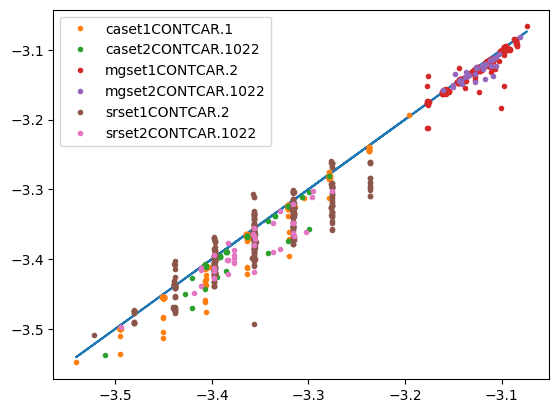

In [46]:
nn = int(len(df)/3)+1
plt.plot(ax,ax)
for i in range(0, 3):
    plt.plot(ax[nn*i:nn*i+447], ay[nn*i:nn*i+447],'.',label = al[nn*i])
    plt.plot(ax[nn*i+448:nn*(i+1)-1], ay[nn*i+448:nn*(i+1)-1],'.',label = al[nn*i+447])    
    #plt.scatter(ax[nn*i:nn*(i+1)-1], ay[nn*i:nn*(i+1)-1],label = f'{nn*i} to {nn*(i+1)-1}',c=[i for i in range(nn-1)],alpha=0.2,marker='.')
    #plt.colorbar()
    plt.legend()

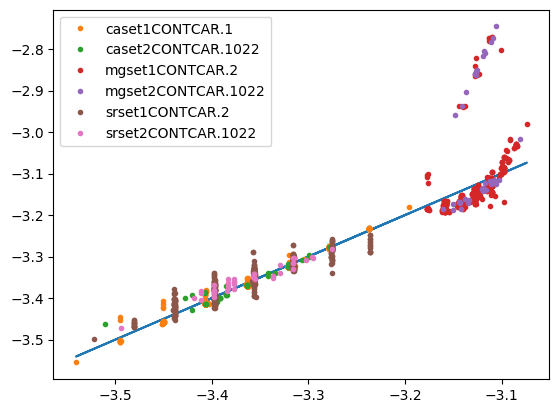

In [27]:

nn = int(len(df)/3)+1
plt.plot(ax,ax)
for i in range(0, 3):
    plt.plot(ax[nn*i:nn*i+447], ay[nn*i:nn*i+447],'.',label = al[nn*i])
    plt.plot(ax[nn*i+448:nn*(i+1)-1], ay[nn*i+448:nn*(i+1)-1],'.',label = al[nn*i+447])
    
    #plt.scatter(ax[nn*i:nn*(i+1)-1], ay[nn*i:nn*(i+1)-1],label = f'{nn*i} to {nn*(i+1)-1}',c=[i for i in range(nn-1)],alpha=0.2,marker='.')
    #plt.colorbar()
    plt.legend()

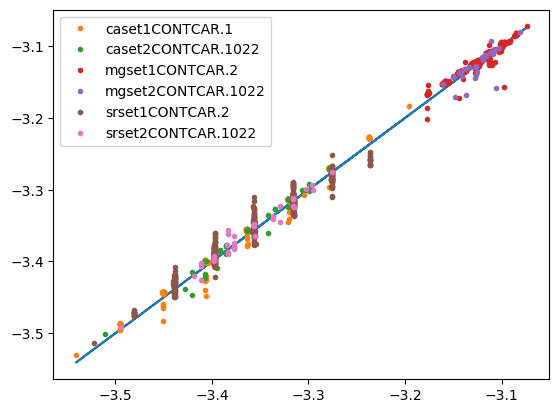

In [21]:
#original ALL model
nn = int(len(df)/3)+1
plt.plot(ax,ax)
for i in range(0, 3):
    plt.plot(ax[nn*i:nn*i+447], ay[nn*i:nn*i+447],'.',label = al[nn*i])
    plt.plot(ax[nn*i+448:nn*(i+1)-1], ay[nn*i+448:nn*(i+1)-1],'.',label = al[nn*i+447])
    
    #plt.scatter(ax[nn*i:nn*(i+1)-1], ay[nn*i:nn*(i+1)-1],label = f'{nn*i} to {nn*(i+1)-1}',c=[i for i in range(nn-1)],alpha=0.2,marker='.')
    #plt.colorbar()
    plt.legend()

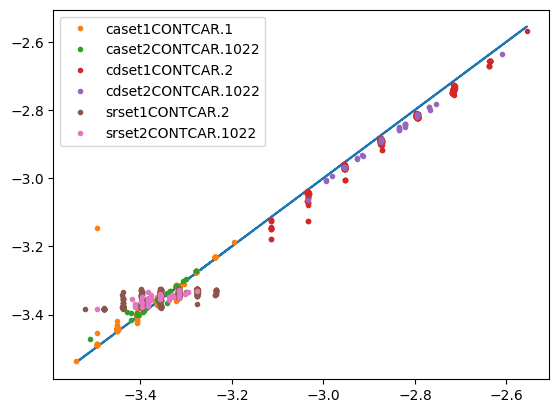

In [11]:
#ex_mg fixed
nn = int(len(df)/3)+1
plt.plot(ax,ax)
for i in range(0, 3):
    plt.plot(ax[nn*i:nn*i+447], ay[nn*i:nn*i+447],'.',label = al[nn*i])
    plt.plot(ax[nn*i+448:nn*(i+1)-1], ay[nn*i+448:nn*(i+1)-1],'.',label = al[nn*i+447])
    
    #plt.scatter(ax[nn*i:nn*(i+1)-1], ay[nn*i:nn*(i+1)-1],label = f'{nn*i} to {nn*(i+1)-1}',c=[i for i in range(nn-1)],alpha=0.2,marker='.')
    #plt.colorbar()
    plt.legend()

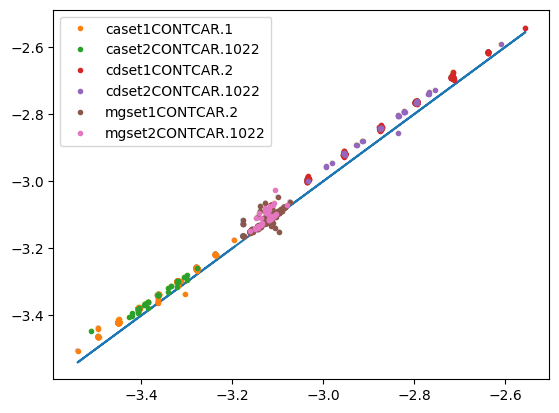

In [15]:
#ex_sr.
nn = int(len(df)/3)+1
plt.plot(ax,ax)
for i in range(0, 3):
    plt.plot(ax[nn*i:nn*i+447], ay[nn*i:nn*i+447],'.',label = al[nn*i])
    plt.plot(ax[nn*i+448:nn*(i+1)-1], ay[nn*i+448:nn*(i+1)-1],'.',label = al[nn*i+447])
    plt.scatter(ax[nn*i:nn*(i+1)-1], ay[nn*i:nn*(i+1)-1],c=[i for i in range(nn-1)],alpha=0.2,marker='.')
    #plt.colorbar()
    plt.legend()